### Exercicis per practicar amb regressions.

In [247]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [248]:
drive.mount ('/content/drive')
%cd'/content/drive/MyDrive/Data/'
df = pd.read_csv('housing data.csv', names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATTIO', 'B', 'LSTAT', 'MEDV'])
df.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Data


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATTIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


Definició de les variables:

* CRIM-> index de criminalitat per capita.
* ZN-> proporció de superfície residencial establera en lots majors de 25.000sq.ft (2.223 m2).
* INDUS-> proporció de superfície de negoci no minorista.
* CHAS-> Variable dummy (1 - si està en un tram considerat a la rivera del riu 'Charles', 0 - si no ho està)
* NOX-> concentració de òxid de nitrogen (part per 10 millions)
* RM-> número promitg d'habitacions per vivenda.
* AGE-> proporció de vivendes ocupades contruïdes abans del 1940.
* DIS-> distàncies ponderades a cinc centres de treball de Boston.
* RAD-> índex d'accessibilitat a les autopistas radials.
* TAX-> Part de l'impost de bens inmobles per cada 10.000 dólars de propietat.
* PTRATTIO-> ratio d'alumnes per professor.
* B-> 1000(Bk - 0.63)^2, on Bk es la proporció de persones afro-americanes.
* LSTAT-> % de població de baix nivell d'estatus social.
* MEDV-> valor mitja de les vivendes ocupades en 1k dólars.

## Preprocessat

Mirem si hi ha valors nuls o nans

In [250]:
df.isna().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATTIO    0
B           0
LSTAT       0
MEDV        0
dtype: int64

In [251]:
df.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATTIO    0
B           0
LSTAT       0
MEDV        0
dtype: int64

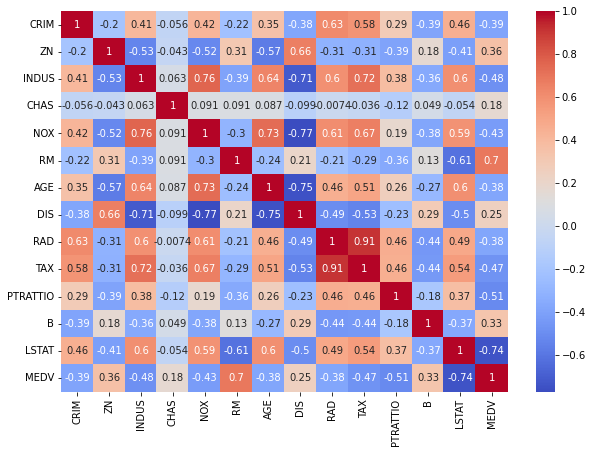

In [252]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)

A continuació farem un test d'hipòtesis per a cada columna per comprovar la seva distribució.

H0-> La distribució és normal

H1-> La distribució no es normal

In [253]:
from scipy.stats import shapiro

for i in df.columns:
  stat, p = shapiro(df[i])
  print('stat=%.3f, p-value= %.5f' % (stat, p))
  if p > 0.05:
	  print(f' Acteptem la hipòtesis nulala variable {i} probablement tingui una distribució normal\n')
  else:
	  print(f' Rebutjem la hipòtesis nula -> La variable {i} probablement no tingui una distribució normal\n')

stat=0.450, p-value= 0.00000
 Rebutjem la hipòtesis nula -> La variable CRIM probablement no tingui una distribució normal

stat=0.556, p-value= 0.00000
 Rebutjem la hipòtesis nula -> La variable ZN probablement no tingui una distribució normal

stat=0.900, p-value= 0.00000
 Rebutjem la hipòtesis nula -> La variable INDUS probablement no tingui una distribució normal

stat=0.275, p-value= 0.00000
 Rebutjem la hipòtesis nula -> La variable CHAS probablement no tingui una distribució normal

stat=0.936, p-value= 0.00000
 Rebutjem la hipòtesis nula -> La variable NOX probablement no tingui una distribució normal

stat=0.961, p-value= 0.00000
 Rebutjem la hipòtesis nula -> La variable RM probablement no tingui una distribució normal

stat=0.892, p-value= 0.00000
 Rebutjem la hipòtesis nula -> La variable AGE probablement no tingui una distribució normal

stat=0.903, p-value= 0.00000
 Rebutjem la hipòtesis nula -> La variable DIS probablement no tingui una distribució normal

stat=0.680, p-

Veiem que totes les variables tenen una distribució no gausiana, ara veiem si tenen outliers amb l'ajuda del boxplot.

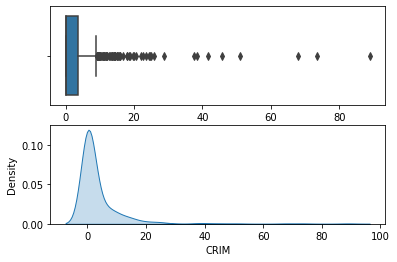

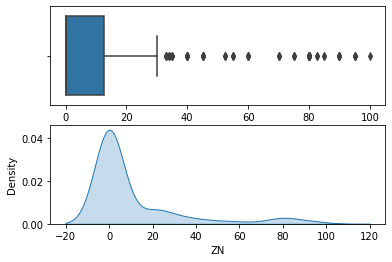

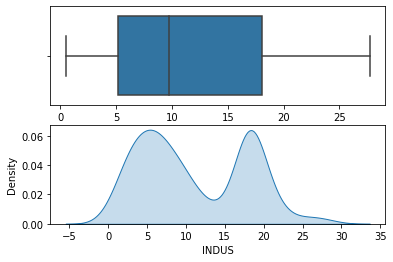

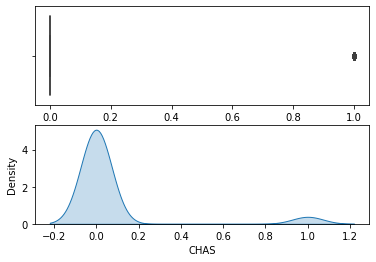

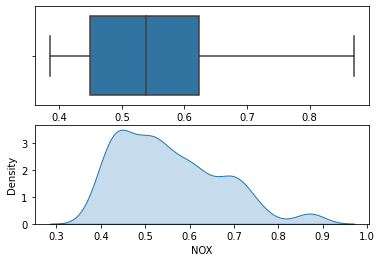

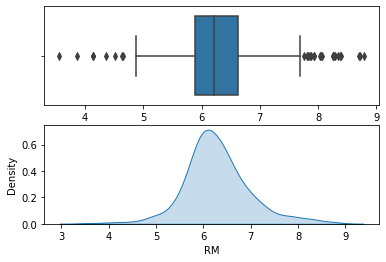

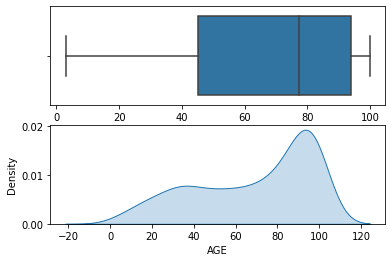

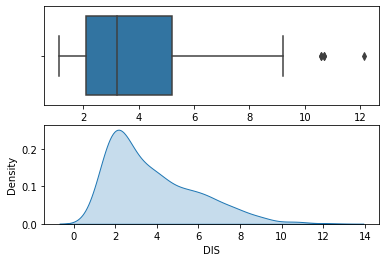

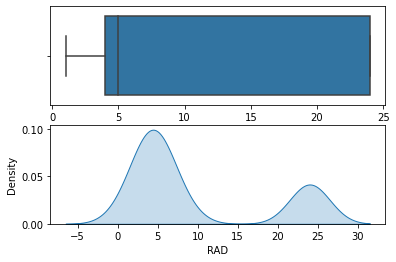

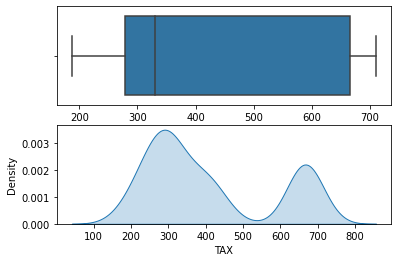

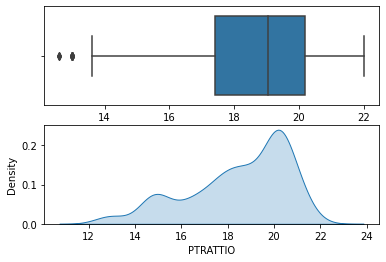

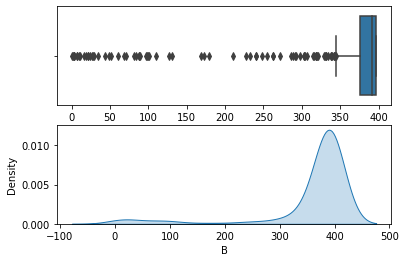

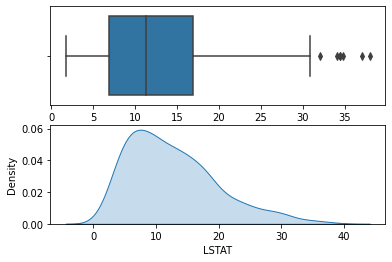

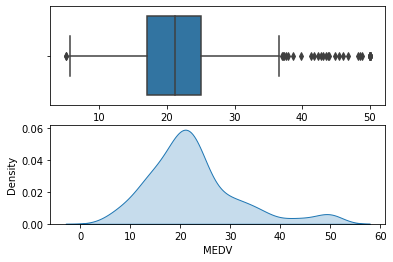

In [254]:
import warnings
warnings.filterwarnings('ignore')

for i in df.columns:
  f, (ax_box, ax_kde) = plt.subplots(2)
  sns.boxplot(df[i], ax = ax_box)
  sns.kdeplot(df[i], ax = ax_kde, fill=True)

Després d'haber vist els outliers de cada variable arribem a la conclusió que les tranformacions per a cada variabla seràn les següents.

Robust Scaler:
crim, zn, rm, dis, ptrattio, b, lstat

Normalització:
indus, nox, age, tax

Dummy:
rad


In [255]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

columns = ['CRIM','ZN', 'RM', 'DIS', 'PTRATTIO', 'B', 'LSTAT']
robust = RobustScaler().fit(df[columns])
df[columns] = robust.transform(df[columns])

columns = ['INDUS', 'NOX', 'AGE', 'TAX']
norm = MinMaxScaler().fit(df[columns])
df[columns] = norm.transform(df[columns])


In [256]:
df.RAD.value_counts()

24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: RAD, dtype: int64

In [257]:
dummies = pd.get_dummies(df.RAD)

In [258]:
df = df.join(dummies, how='left')
df = df.drop(['RAD'], axis=1)

# Exercici 1
**Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.**

In [260]:
from sklearn.metrics import mean_squared_error as mse

In [261]:
#Definim les variables d'entrada i de sortida
X = df.drop(['MEDV'], axis = 1)
Y = df.MEDV

In [263]:
#Dividim les dades en train/test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 10)

### Regressió lineal

Separem les dades per test i train, entrenem el model i l'evaluem.


In [264]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, Y_train)

In [265]:
lr_r = lr.score(X_test, Y_test)
print(f'Puntuació en R2: {lr_r}')

Puntuació en R2: 0.6934620738034478


In [266]:
Y_pred = lr.predict(X_test)
lr_mse = round(mse(Y_test, Y_pred), 2)
print(f'Puntuació en MSE: {lr_mse}')

Puntuació en MSE: 29.93


In [267]:
compara = pd.DataFrame({'Real': Y_test.values.flatten(), 'Predit': Y_pred.flatten()})
compara

,Real,Predit
0,28.4,33.327372
1,31.1,29.240725
2,23.5,31.682631
3,26.6,18.819388
4,19.6,19.620270
...,...,...
147,24.7,25.483665
148,21.0,22.458066
149,19.4,27.236971
150,10.9,11.456118


### Arbre de regressió

In [268]:
from sklearn.tree import DecisionTreeRegressor

tr = DecisionTreeRegressor().fit(X_train,Y_train)

In [269]:
tr_r = tr.score(X_test, Y_test)
print(f'Puntuació en R2: {tr_r}')

Puntuació en R2: 0.7660476528942172


In [270]:
Y_pred = tr.predict(X_test)
tr_mse = round(mse(Y_test, Y_pred), 2)
print(f'Puntuació en MSE: {tr_mse}')

Puntuació en MSE: 22.84


In [271]:
compara = pd.DataFrame({'Real': Y_test.values.flatten(), 'Predit': Y_pred.flatten()})
compara

,Real,Predit
0,28.4,23.3
1,31.1,26.2
2,23.5,24.8
3,26.6,24.5
4,19.6,20.8
...,...,...
147,24.7,22.5
148,21.0,24.7
149,19.4,21.1
150,10.9,11.7


### Random Forest

In [295]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor().fit(X_train, Y_train)

In [273]:
rf_r = rf.score(X_test, Y_test)
print(f'Puntuació en R2: {rf_r}')

Puntuació en R2: 0.8782593255652542


In [275]:
Y_pred = rf.predict(X_test)
rf_mse = round(mse(Y_test, Y_pred), 2)
print(f'Puntuació en MSE: {rf_mse}')

Puntuació en MSE: 11.89


In [276]:
compara = pd.DataFrame({'Real': Y_test.values.flatten(), 'Predit': Y_pred.flatten()})
compara

,Real,Predit
0,28.4,24.559
1,31.1,28.480
2,23.5,27.846
3,26.6,28.232
4,19.6,19.688
...,...,...
147,24.7,23.442
148,21.0,21.377
149,19.4,20.060
150,10.9,14.851


# Exercici 2
**Compara’ls en base al MSE i al R2.**

Grafquem els valors de R2 i MSE per veure-ho més visualment 

In [296]:
models = np.array(['Regressió lineal', 'Tree Regression', 'Random Forest'])
R2 = np.array([lr_r, tr_r, rf_r])
MSE = np.array([lr_mse, tr_mse, rf_mse])

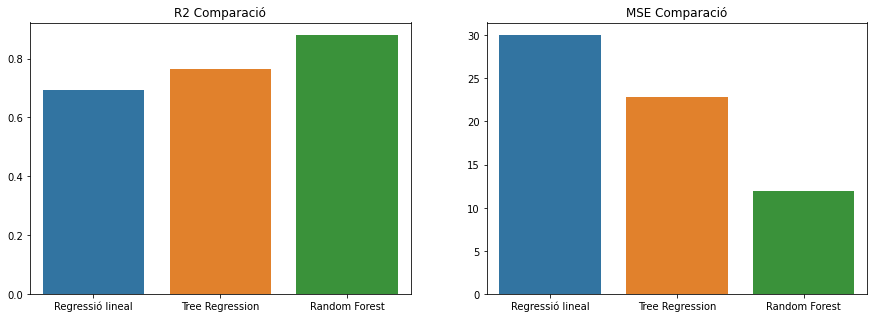

In [297]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(1, 2, 1)
plt.title('R2 Comparació')
p = sns.barplot(x= models, y=R2)

ax1 = fig.add_subplot(1, 2, 2)
plt.title('MSE Comparació')
sns.barplot(x=models, y=MSE)

Sembla el model més precís ha estat el Random Forest, seguit de Tree Regression i per últim el de regressió lineal.

# Exercici 3
**Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.**

### Hiperparàmetres de Linear Regressor

In [279]:
from sklearn.model_selection import GridSearchCV

#Seleccionem els parametres més sensibles al model
grid = {'fit_intercept': [True, False],
        'copy_X': [True, False],
        'n_jobs': [None, 1],
        }
lr_bp= GridSearchCV(lr, grid, cv=5).fit(X_train, Y_train)
lr_bestParams = lr_bp.best_score_
print(lr_bestParams)
print(lr_bp.best_params_)

0.7169029546435339
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None}


### Hiperparàmetres de Decision Tree Regressor

In [280]:
from sklearn.model_selection import RandomizedSearchCV
grid = [{'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
         'max_features': ['sqrt', 'log2', None],
         'max_depth': range(2,1000),
         'min_samples_split': range(2,1000),
         'splitter': ['best', 'random']}]
tr_bp = RandomizedSearchCV(tr, grid, cv=5).fit(X_train, Y_train)
tr_bestParams = tr_bp.best_score_
print(tr_bestParams)
print(tr_bp.best_params_)


0.35725330386006826
{'splitter': 'random', 'min_samples_split': 88, 'max_features': 'log2', 'max_depth': 160, 'criterion': 'poisson'}


### Hiperparàmetres de Random Forest

In [281]:
grid = [{'max_depth': range(20,60),
        'n_estimators': range(10,150),
        'max_features': ('sqrt', 'log2', None),
        'max_samples': (1/3, 2/3)}]
rf_bp = RandomizedSearchCV(rf, grid, cv=5).fit(X_train, Y_train)
rf_bestParams = rf_bp.best_score_
print(rf_bestParams)
print(rf_bp.best_params_)

0.8224898578074693
{'n_estimators': 36, 'max_samples': 0.6666666666666666, 'max_features': None, 'max_depth': 29}


Comparació de les diferents puntuacions de R2 abans i després de obtenir els hiperparàmetres de cada model.

In [282]:
comparacio = pd.DataFrame(data = [['Linear Regression', lr_r, lr_bestParams],
                     ['Decision Tree Regressor', tr_r, tr_bestParams],
                     ['Random Forest Regressor', rf_r, rf_bestParams]],
                     columns=['Model', 'R2', 'R2 (best parameters)'])
comparacio

,Model,R2,R2 (best parameters)
0,Linear Regression,0.693462,0.716903
1,Decision Tree Regressor,0.766048,0.357253
2,Random Forest Regressor,0.878259,0.822490


Tot i haver entrenat el model amb els millors paràmentres, no hem obtingut una millora en els resultats.

# Exercici 4
**Compara el seu rendiment emprant l’aproximació train/test o emprant totes les dades (validació interna).**

In [283]:
from sklearn.model_selection import cross_val_score

lr_cv = cross_val_score(lr, X_train, Y_train, cv=5, scoring='r2')
tr_cv = cross_val_score(tr, X_train, Y_train, cv=5, scoring='r2')
rf_cv = cross_val_score(rf, X_train, Y_train, cv=5, scoring='r2')

In [285]:
comparacio['R2 (Cross Validation)'] = (lr_cv.mean(), tr_cv.mean(), rf_cv.mean())
comparacio

,Model,R2,R2 (best parameters),R2 (Cross Validation)
0,Linear Regression,0.693462,0.716903,0.716903
1,Decision Tree Regressor,0.766048,0.357253,0.786193
2,Random Forest Regressor,0.878259,0.822490,0.821574


A partir del Cross Validation, obtenim un valor més realista que abans, ja que ara ha tingut en compte 5 convinacions de train/test diferents enlloc de una.

# Exercici 5
**No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.**

Creem el mateix model de random forest però ignorant la variable 'RM' i compararem els resultats.

In [286]:
X = df.drop(columns =['MEDV', 'RM'], axis=1)
Y = df.MEDV

In [287]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 10)

In [294]:
lr2 = LinearRegression().fit(X_train, Y_train)
tr2 = DecisionTreeRegressor().fit(X_train, Y_train)
rf2 = RandomForestRegressor().fit(X_train, Y_train)
comparacio['R2 (without RM)'] = (lr2.score(X_test, Y_test), tr2.score(X_test, Y_test), rf2.score(X_test, Y_test))
comparacio

,Model,R2,R2 (best parameters),R2 (Cross Validation),R2 (without RM)
0,Linear Regression,0.693462,0.716903,0.716903,0.630381
1,Decision Tree Regressor,0.766048,0.357253,0.786193,0.679553
2,Random Forest Regressor,0.878259,0.822490,0.821574,0.818068


Veiem que ens dona una puntuació inferior a la obtinguda excloent la variable 'RM'.